# Generating neurons with MCMC algorithm
This script presents the method of generating neuron using naive base Markov Chain Monte Carlo. The method can be summerize in two steps:
- Reading the database and extracing the fetur
- using MCMC to generate the neuron


### Imports

In [1]:
import numpy as np
import sys
sys.path.append("/home/roozbeh/morphology/Projects")
import McNeuron
import matplotlib.pyplot as plt
from copy import deepcopy
from numpy.linalg import inv
from collections import Counter
import pickle
%matplotlib inline

# Load data

/Users/RoozbehFarhoudi/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


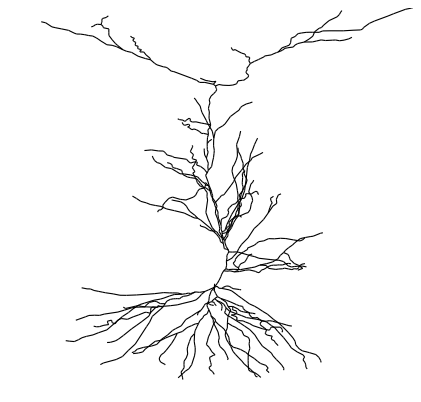

In [2]:
data = pickle.load(open("pyramidal.p", "rb" ))
n = McNeuron.Neuron(input_file=data['X'][5])
McNeuron.visualize.plot_2D(n)

In [ ]:
important_labels = ['Archive Name', 'Objective Type', 'Tertiary Brain Region', 'Reconstruction Method','Secondary Cell Class',
'Staining Method', 'Species Name','Experimental Condition','Structural Domains',
 'Gender','Structural Domains','Physical Integrity','Secondary Brain Region','Development','Primary Cell Class',
 'Tertiary Cell Class', 'Experiment Protocol','Morphological Attributes', 'Primary Brain Region', 'Magnification']
for label in important_labels:
    print(label)
    for key, value in sorted(Counter(data['Y'][label]).iteritems(), 
                         key=lambda (k,v): (v,k)):
        print "%s: %s" % (key, value)
    print("\n")

# Making Database

In [5]:
hist_features = {
    'branch angle': np.arange(0,np.pi,np.pi/20),
    'segmental branch angle' : np.arange(0,np.pi,np.pi/20),
    'side branch angle': np.arange(0,np.pi,np.pi/20),
    'global angle': np.arange(0,np.pi,np.pi/20),
    'local angle': np.arange(0,np.pi,np.pi/20),
    'curvature' : np.arange(0,np.pi,np.pi/20),
    'distance from root' : np.arange(0,60,5),
    'neuronal/euclidean for segments' : np.arange(1, 3, .1),
    'neuronal/euclidean' : np.arange(1, 3, .1),
    }
value_features = {
    'Nnodes',
    'Nbranch',
    #'Nsoma',
    'initial segments',
    'Npassnode',
    'mean neuronal/euclidean',
    'mean segmental neuronal/euclidean',
    'mean segmental neural length',
    #'branch branch',
    #'branch die',
    #'die die'
    #'mean segmental euclidean length',
}
vec_value = {
    'pictural image xy',
    #'pictural image xyz',
    'pictural image xy tips',
    'discrepancy space',
    'self avoidance',
    #'branch depth',
    #'continue depth',
    #'dead depth'
    #'diameter euclidean (bins)'
}
# c = McNeuron.NeuronCollection.Collection(input_format='swc', 
#                                           input_file=L_neuron[1830:1836])
c = McNeuron.NeuronCollection.Collection()
c.set_subsampling_length(20)
c.fit(input_format='Matrix of swc without Node class', input_file=data['X'][15:25])
c.set_features()
c.hist_features = hist_features
c.vec_value = vec_value
c.set_value(list_features=value_features)
c.set_hist(list_features = hist_features,
           hist_range=hist_features)
c.set_vec_value(vec_value)

0
1
2
3
4
5
6
7
8
9


### Show database

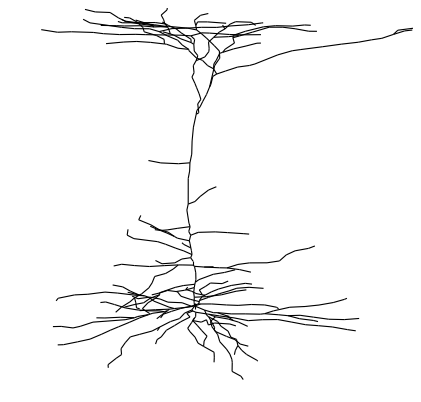

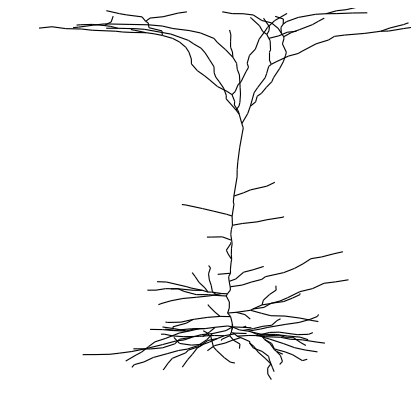

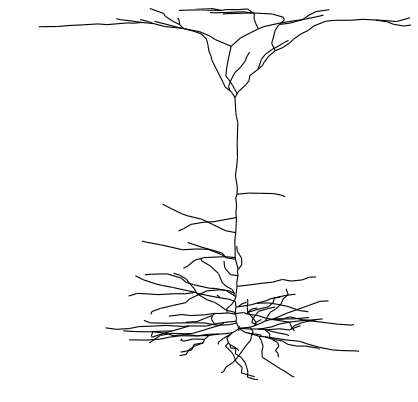

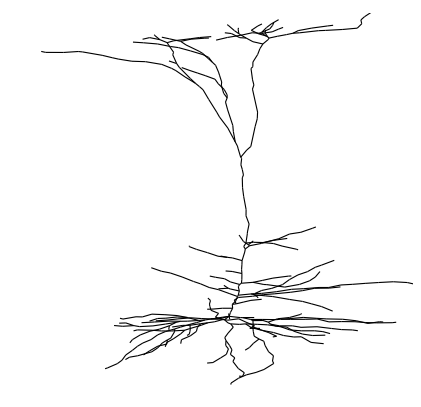

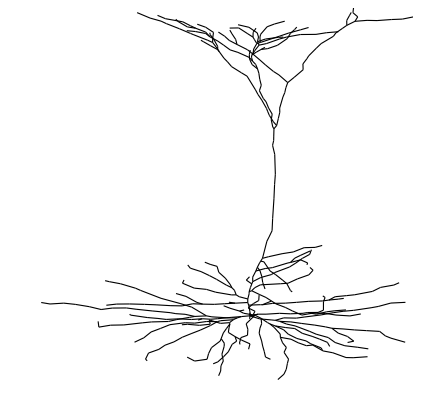

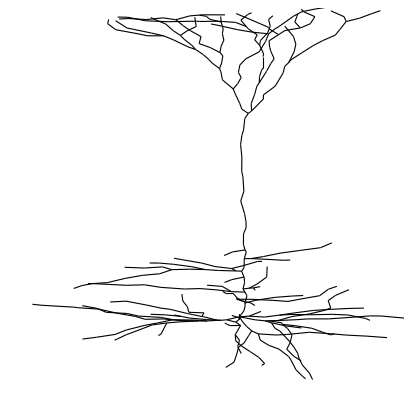

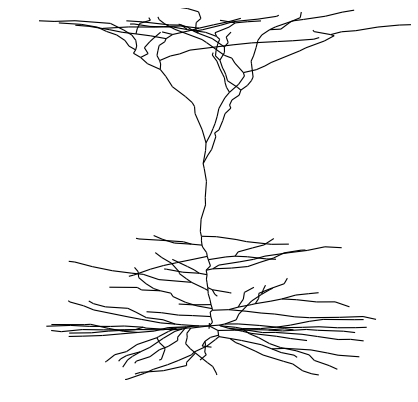

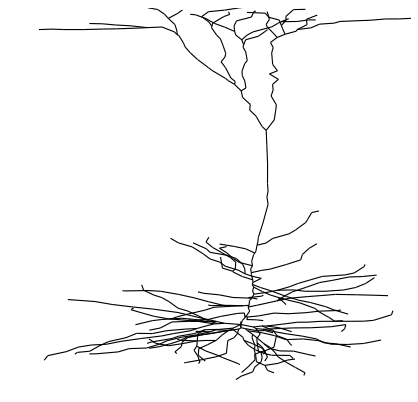

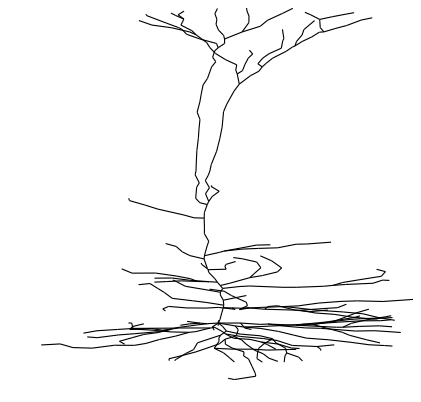

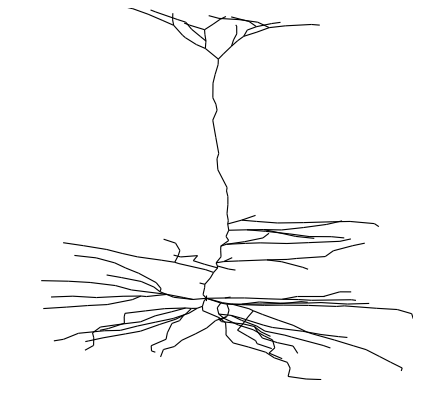

Nbranch
64.4
7.87654746701


initial segments
7.3
0.458257569496


mean segmental neural length
3.73705105599
0.179071274282


mean neuronal/euclidean
0.124951469905
0.0276858960093


Npassnode
365.9
52.9442159258


Nnodes
500.0
67.2800118906


mean segmental neuronal/euclidean
0.0622283240808
0.018377663864


neuronal/euclidean for segments


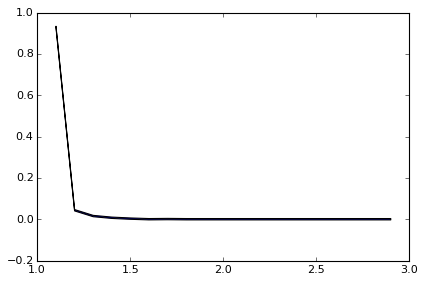

global angle


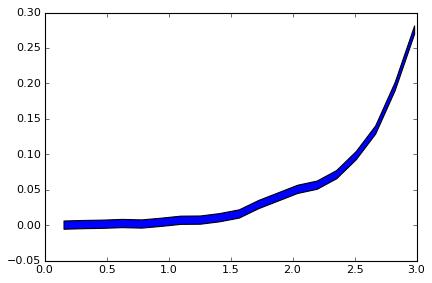

neuronal/euclidean


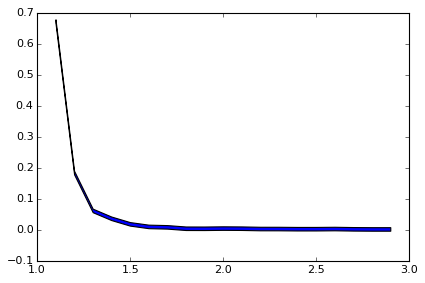

distance from root


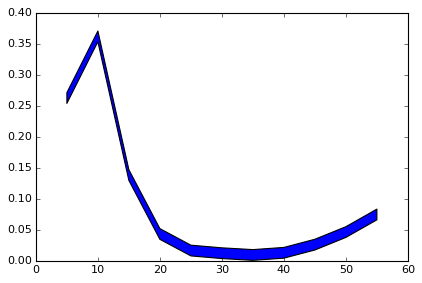

segmental branch angle


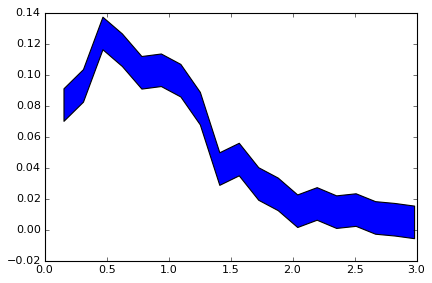

local angle


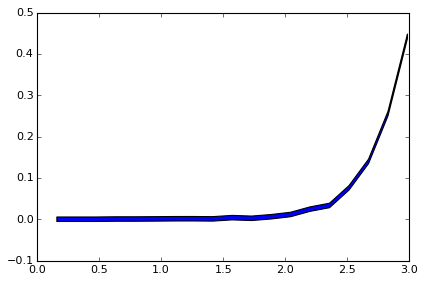

branch angle


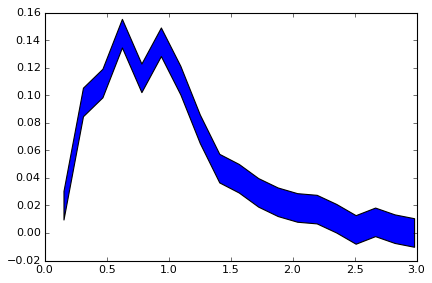

curvature


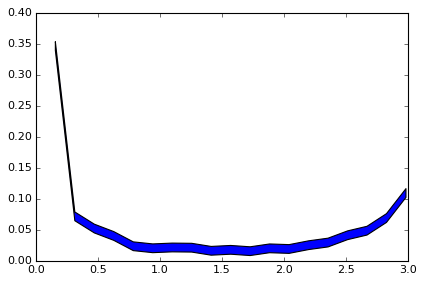

side branch angle


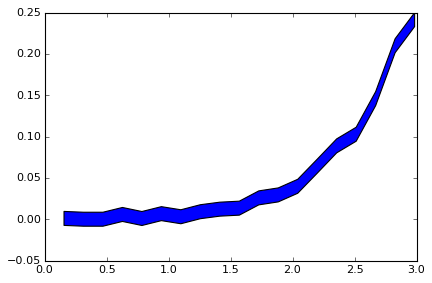

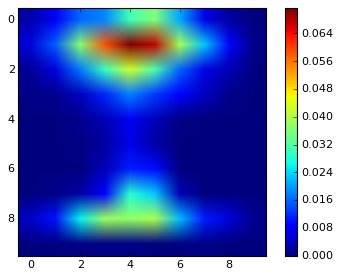

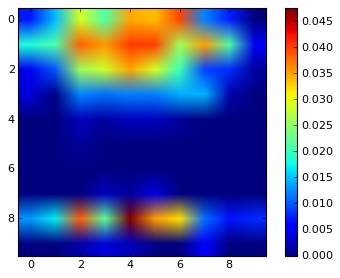

pictural image xy tips


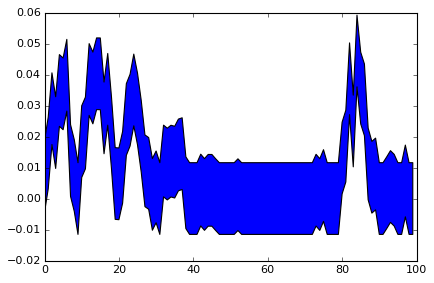

discrepancy space


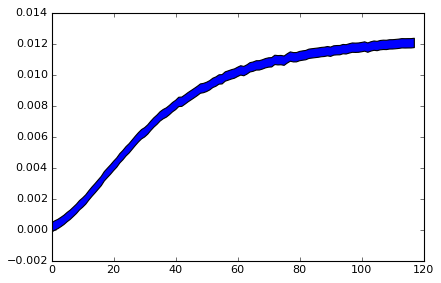

self avoidance


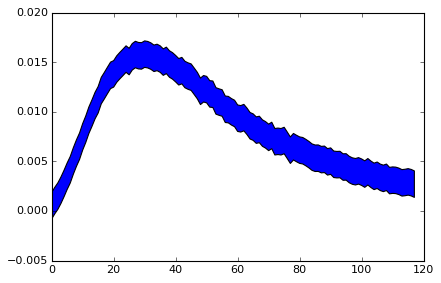

pictural image xy


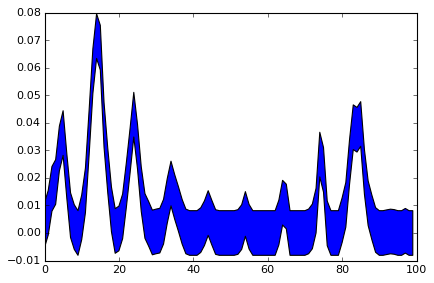

In [6]:
McNeuron.visualize.show_database(c)

In [ ]:
# plt.imshow(c.mean_vec_value['pictural image xy'].reshape(10, 10).T,interpolation='nearest')
# plt.colorbar()
# plt.savefig('pyramidal.eps')

## Normlizer

In [ ]:
# normlizer = c.normlizor(3)
# normlizer['pictural image xy'] *=1.95
# normlizer['pictural image xy tips'] *=1.45
# normlizer['mean neuronal/euclidean'] *=1
# normlizer['Nbranch'] *=.3
# #normlizer['ratio_diameter_euclidean'] *=.3
# normlizer['self avoidance'] *=2
# normlizer['local angle'] *=1.2
# normlizer['branch angle'] *=1
# normlizer['mean segmental neuronal/euclidean'] *=.8
# normlizer['mean segmental neural length'] *=.05
# normlizer['discrepancy space'] *=2
# normlizer['side branch angle'] *=.5

In [30]:
normlizer = c.normlizor(10)
normlizer['mean segmental neural length'] *=.05

## MCMC on database

In [1]:
wing_number = int(np.floor(c.mean_value['initial segments']))
nnode = np.array([])
for n in c.database:
    nnode = np.append(nnode, n.n_node)
node_on_each_wings = int(np.floor(nnode.mean()/wing_number))

nnode = np.array([])
for n in c.database:
    nnode = np.append(nnode, n.n_node)
nnode.mean()

mean_len = 10
in_neuron = \
    McNeuron.neuron_util.star_neuron(wing_number=wing_number,
                                     spherical=None,
                                     node_on_each_wings=node_on_each_wings,
                                     length=mean_len)
#in_neuron = c.database[3]
#in_neuron = deepcopy(perneron)
per = McNeuron.MCMC(neuron=in_neuron, 
                    iterations=10, 
                    verbose=0)

per.set_mean_var_length(mean=mean_len, var=mean_len/3)

per.hist_features=hist_features
per.value_features=value_features
per.vec_value=vec_value
per.set_verbose(0)
per.set_trend()
L = {'extension/reduction': 0,
     'extension/reduction end points': 0,
     #'add/remove' : 0.,
     #'rescale toward end' : 0,
     #'diameter' : 0.,
    
     'diameter_toward' : 0. ,

     'rotation for any node' : 3.,
     'rotation for branching' : 4.,
     #'location toward end' : 0.,
     #'location' : .1,
     #'location for important point' : .0,
    
     'sliding general' : .5,
     'sliding certain in distance' : 1.,
     'sliding for branching node' : .5,
     'sliding for branching node certain distance' : 1.,
     'sliding for end nodes': 2.
     #'stretching vertical' : .0,
     #'stretching horizental' : .0
}
per.kappa_rotation = 400.
per.rescale_value = 0
per.sliding_limit = 10*mean_len
per.horizental_stretch = .1
per.vertical_stretch = .1
per.location_toward_cte = .5
per.location_important = 5.
per.set_database(c)
per.set_feature_normalizer(normlizer)
per.set_probability(L)
per.fit()
gen = per.neuron
McNeuron.visualize.plot_2D(gen,dpi = 120, line_width=1,size_x = 6);
per.show_MCMC(1,14,6)
#McNeuron.neuron_util.check_neuron(per.neuron)
#per.neuron.show_features()

NameError: name 'np' is not defined

In [24]:
S = np.zeros([10])
for i in range(10):
    S[i] = per.distance(c.database[i])[0]
print S.mean()
print S.std()

392.337837392
54.1810720984


## Start from the current neuron

In [ ]:
per.neuron = per.evo[-1]
per.set_n_iteration(10)
per.set_verbose(3)
#per.set_feature_normalizer(normlizer)
#per.set_probability(L)
per.fit()
McNeuron.visualize.plot_2D(per.neuron, line_width=2);
per.show_MCMC(200,14,6)
#per.neuron.show_features()

In [ ]:
McNeuron.visualize.plot_2D(c.database[3],size_x=8, size_y=8,
                          line_width=1.5)

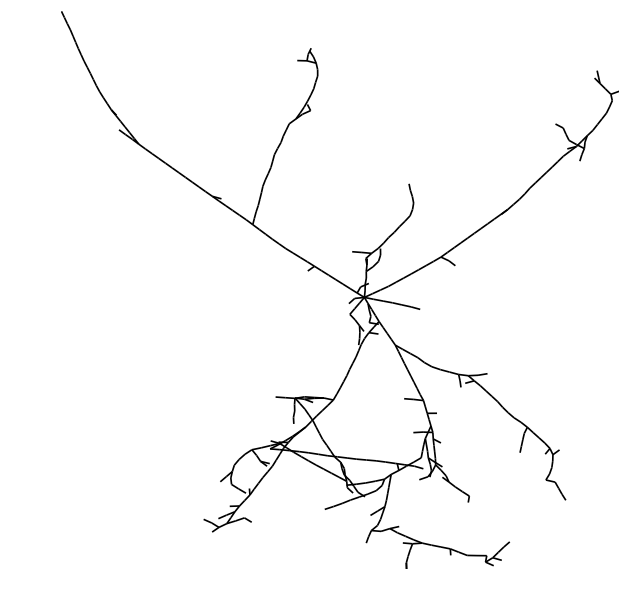

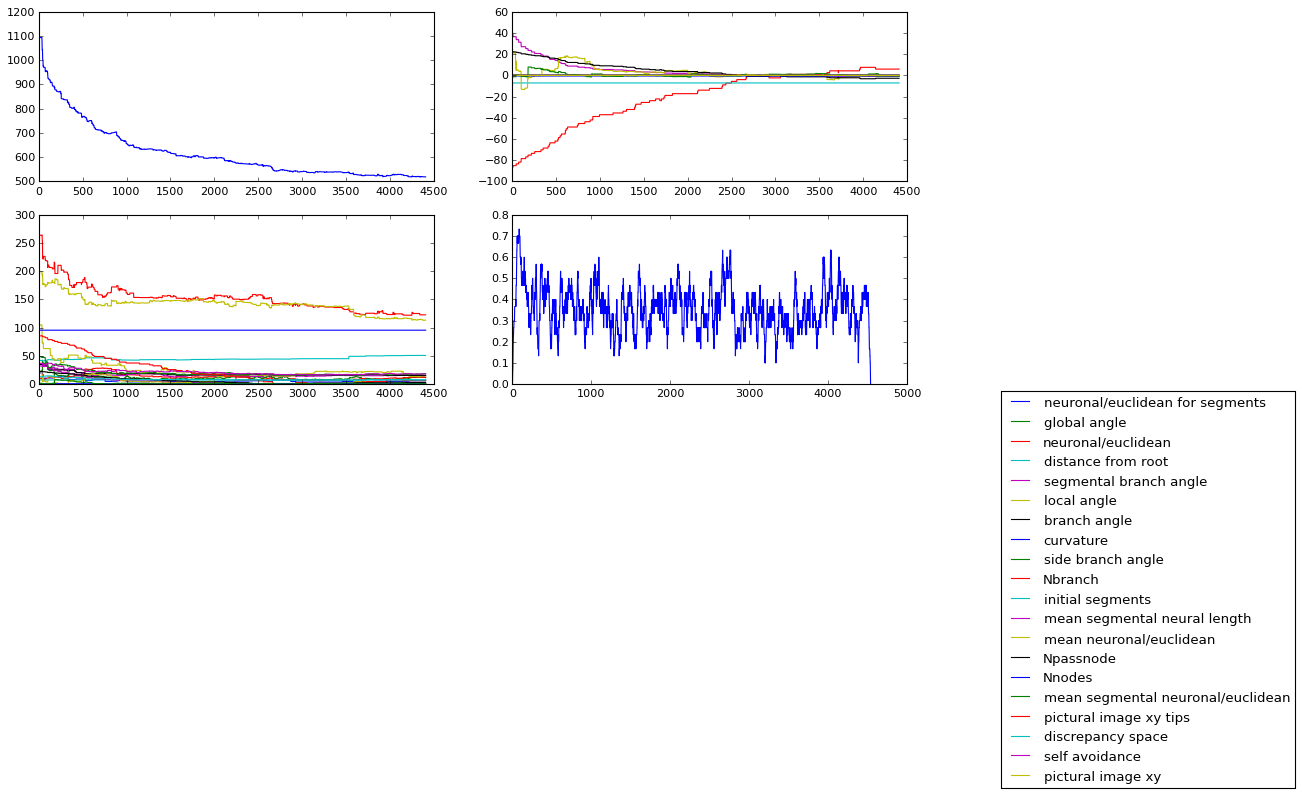

In [39]:
per.set_n_iteration(1500)
per.set_verbose(0)
per.fit()
McNeuron.visualize.plot_2D(per.neuron, dpi = 120, line_width=1)
per.show_MCMC(100,14,6)
#per.neuron.show_features()

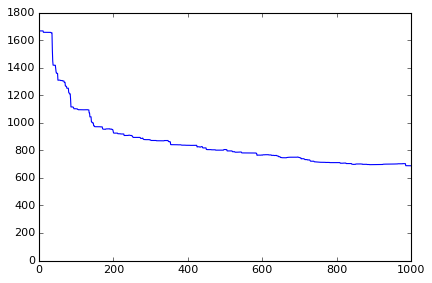

In [37]:
plt.plot(per.trend[:, :1000].sum(axis=0))
#plt.savefig("trend2.eps")

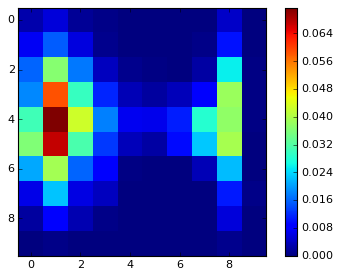

<matplotlib.colorbar.Colorbar instance at 0x10438a200>

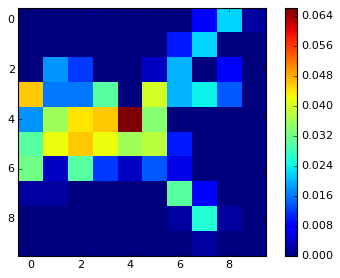

In [35]:
plt.imshow(c.mean_vec_value['pictural image xy'].reshape(10, 10).T,interpolation='nearest')
plt.colorbar()
plt.show()
plt.imshow(per.neuron.features['pictural image xy'].reshape(10, 10).T,interpolation='nearest')
plt.colorbar()

1
3
5
7
10
20
30
65
100


IndexError: list index out of range

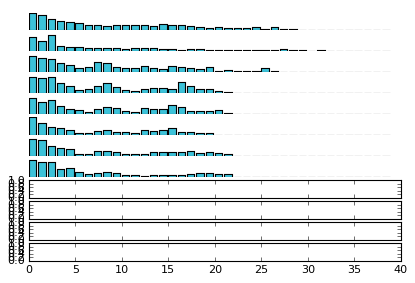

In [27]:
f, ax = plt.subplots(12, sharex=True)
j = 0

for i in [1,3,5,7,10,20,30,65,100,160,250]:
    print i
    a = np.histogram(np.absolute(per.evo[i].location[1,:]), 
                     np.arange(0,1000,25))[0]
    ax[j].bar(np.arange(a.shape[0]), 
            a, 
            width=.8, 
            color='#3CC2D9')
    ax[j].axis('off')
    j +=1
        #plt.show()
a = np.histogram(np.absolute(c.database[1].location[1,:])/1.45, 
             np.arange(0,1000,25))[0]
ax[11].bar(np.arange(a.shape[0]),
        a, 
        #c.mean_hist[name], 
        width=.8, 
        color='#3CC2D9')
ax[j].axis('off')
    #plt.plot(c.mean_hist[name])
    #plt.show()
#plt.savefig('distanceevo.eps')


In [29]:
per.mean_hist

{'branch angle': array([ 0.01979796,  0.09475369,  0.10849385,  0.14469462,  0.11224862,
         0.13843375,  0.11057865,  0.07524456,  0.04670209,  0.03939   ,
         0.02910454,  0.02229829,  0.01817653,  0.01697382,  0.01038902,
         0.00222222,  0.00771946,  0.00277831,  0.        ]),
 'curvature': array([ 0.34593578,  0.07129617,  0.05164974,  0.03964127,  0.0230784 ,
         0.0197909 ,  0.02108931,  0.02075214,  0.01572803,  0.01729213,
         0.01513227,  0.01970532,  0.01864589,  0.02475846,  0.02904146,
         0.0407633 ,  0.04819984,  0.06856841,  0.10893118]),
 'distance from root': array([ 0.26214593,  0.36159063,  0.13784769,  0.0428817 ,  0.01616334,
         0.01185872,  0.00900244,  0.01252809,  0.02569041,  0.04596952,
         0.07432152]),
 'global angle': array([ 0.        ,  0.00077198,  0.00126689,  0.00226116,  0.00157599,
         0.00401725,  0.00685018,  0.00707605,  0.01050961,  0.01576037,
         0.02904315,  0.03974257,  0.05048324,  0.056387

segmental branch angle
1
3
5
7
10
20
30
65
100


IndexError: list index out of range

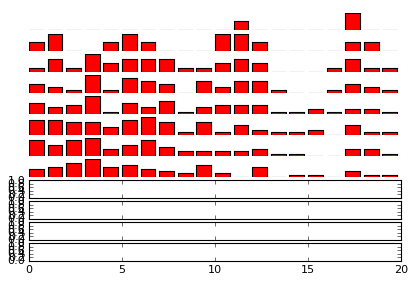

In [20]:
f, ax = plt.subplots(12, sharex=True)
j = 0
for name in [c.hist_features.keys()[4]]:
    print name
    for i in [1,3,5,7,10,20,30,65,100,160,250]:
        print i
        a = np.histogram(per.evo[i].features[name], 
                         #c.hist_features[name])[0]
                         np.append(c.hist_features[name],np.pi))[0]
        ax[j].bar(np.arange(a.shape[0]), 
                a, 
                width=.8, 
                color='red')
        ax[j].axis('off')
        j +=1
        #plt.show()
    ax[11].bar(np.arange(a.shape[0]), 
            np.append(0,c.mean_hist[name]), 
            #c.mean_hist[name], 
            width=.8, 
            color='red')
    ax[j].axis('off')
    #plt.plot(c.mean_hist[name])
    #plt.show()
#plt.savefig('branchangevo.eps')

In [ ]:
McNeuron.visualize.plot_2D(per.evo[2])

In [ ]:
c.vec_value_all.keys()

In [ ]:
for name in c.vec_value_all.keys():
    print name
    for i in [2,5,10,30,100,250]:
        plt.plot(per.evo[i].features[name])
        plt.show()
    plt.plot(c.mean_vec_value[name])
    plt.show()

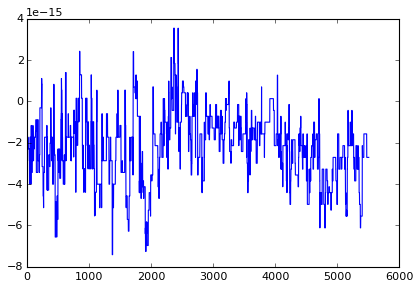

In [21]:
plt.plot(np.transpose(per.trend_normal[19,1000:15000]));

In [ ]:
plt.plot(np.transpose(per.trend[19,0:5000]));

In [ ]:
per.list_features[2]

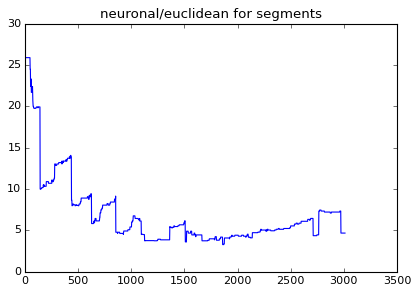

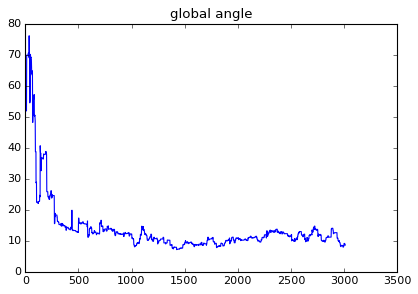

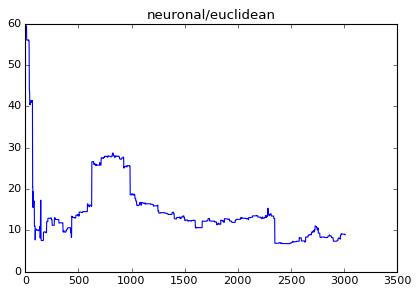

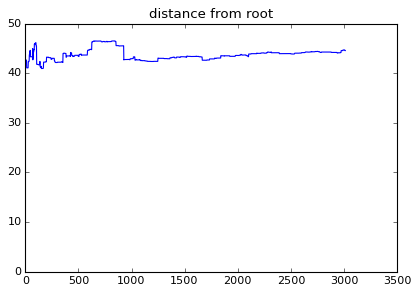

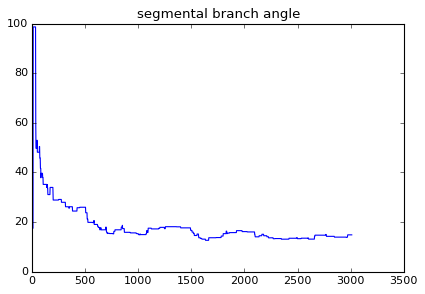

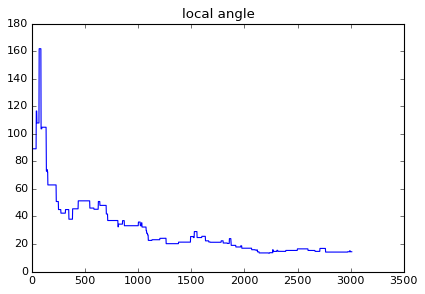

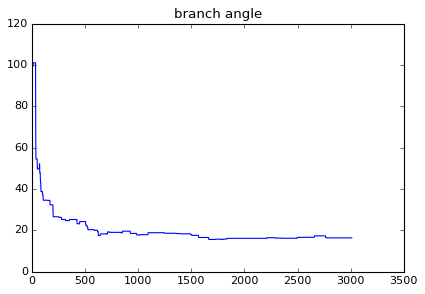

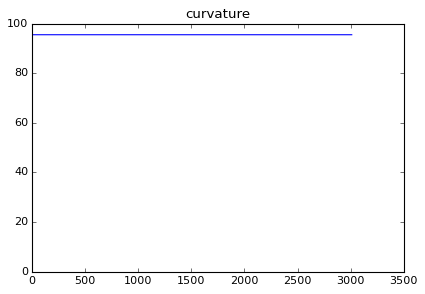

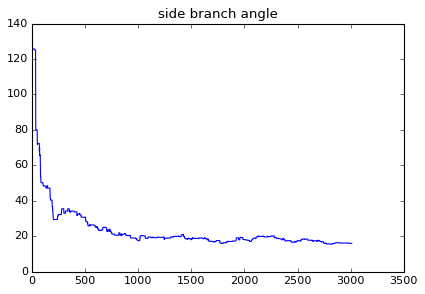

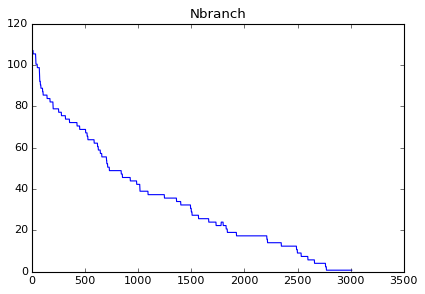

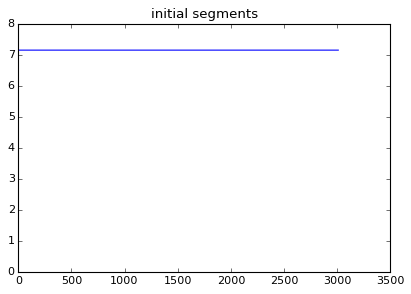

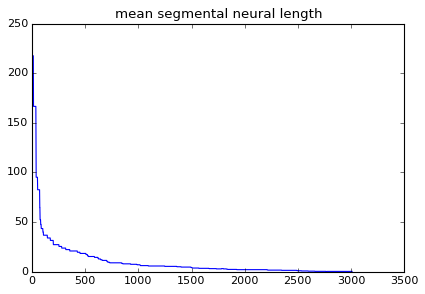

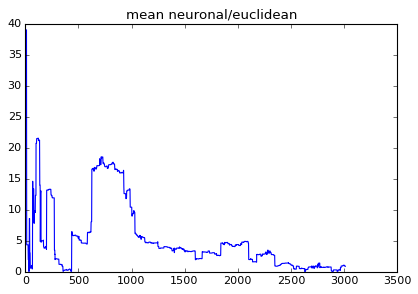

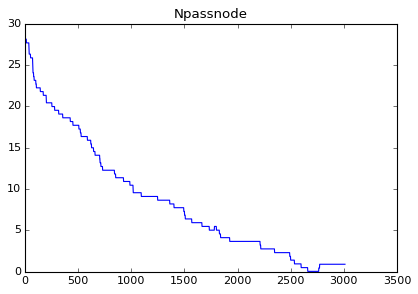

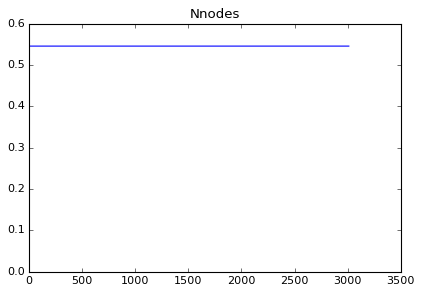

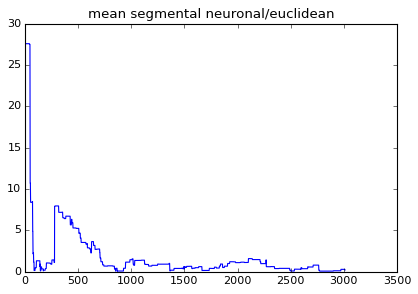

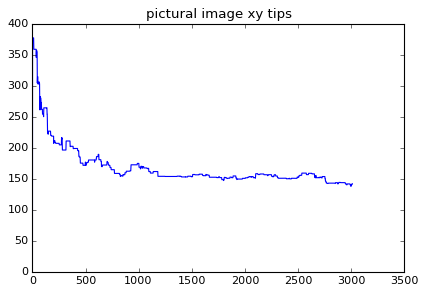

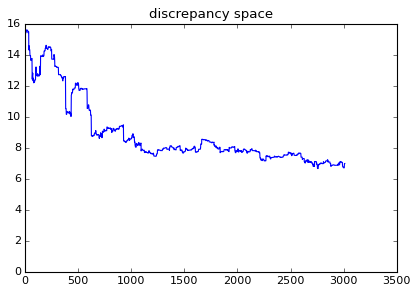

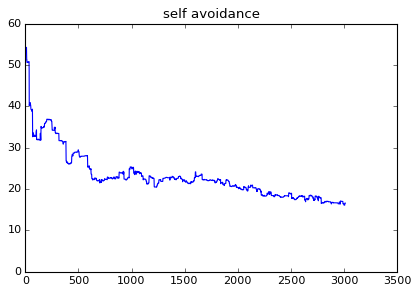

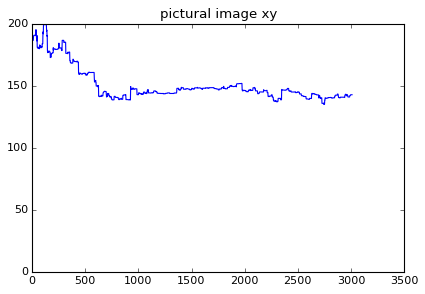

In [38]:
for i in range(len(per.list_features)):
    plt.plot(np.transpose(per.trend[i,:]));
#plt.legend(per.list_features[[0,1,2]],bbox_to_anchor=(2,2))
    plt.title(per.list_features[i])
    #plt.savefig("trend"+str(i)+".eps")
    plt.show()
    
#     plt.plot(np.transpose(per.trend_normal[i,1000:25000]));
# #plt.legend(per.list_features[[0,1,2]],bbox_to_anchor=(2,2))
#     plt.title(per.list_features[i])
#     #plt.savefig("trend"+str(i)+".eps")
#     plt.show()

In [ ]:
save_trend = []
#save_trend_normal = []
save_trend.append()
save_trend_normal.append()


In [ ]:
#d = []
d.append(per.neuron)

In [ ]:
a = np.array([])
for i in range(3):
    d[i].set_features()
    a = np.append(a,d[i].features['branch angle'])

In [ ]:
b = np.histogram(a, 18)[0].astype(float)
plt.bar(np.arange(18),b, color = 'r')
plt.axis('off')
plt.savefig('mcmcgen.eps')

In [ ]:
McNeuron.visualize.plot_2D(per.neuron, save="gen4.eps")

In [ ]:
McNeuron.visualize.plot_dendrogram(per.neuron)

In [ ]:
import scipy
a = scipy.io.loadmat("pine.mat")
n = a["BPar"][:300,0]
McNeuron.visualize.plot_dendrogram(n)

In [ ]:
per.set_n_iteration(2000)
per.set_verbose(0)
per.fit()
McNeuron.visualize.plot_2D(per.neuron, dpi = 120, line_width=1)
per.show_MCMC(100,14,6)
#per.neuron.show_features()

In [ ]:
from matplotlib import collections  as mc
def get_segment_collection(per):
    lines = []

    for raw in range(1):
        for col in range(1):
            #neuron = per.evo[2*raw+16*col]
            #neuron = per.database[raw+3*col]
            neuron = per
            p = neuron.location[0:2, :]
            p = p/(1*p.max())
            translation=(raw, 1-col)

            for i in range(len(neuron.nodes_list)):
                j = neuron.parent_index[i]
                lines.append([(p[0,i] + translation[0],p[1,i] + translation[1]),
                              (p[0,j] + translation[0],p[1,j] + translation[1])])
    lc = mc.LineCollection(lines, color = 'k')
    return lc

In [ ]:
plt.plot(per.neuron.location[2,:])

In [ ]:
len(per.evo)

In [ ]:
lc = get_segment_collection(c)
fig, ax = plt.subplots()
ax.add_collection(lc)
plt.axis('off')
plt.xlim((-1,4))
plt.ylim((-1, 4))
#plt.draw()
plt.show()
fig.savefig("real.eps", format = "eps")

In [ ]:
c = McNeuron.Neuron(input_file=sub_data['X'][33], input_format="Matrix of swc")
lc = get_segment_collection(c)
fig, ax = plt.subplots()
ax.add_collection(lc)
plt.axis('off')
plt.xlim((-2,2))
plt.ylim((-2,2))
#plt.draw()
plt.show()
#fig.savefig("Bikson.eps", format = "eps")

## Evolution

In [ ]:
from matplotlib import collections as mc
def get_segment_collection_neuron(collection,
                                  row=None,
                                  column=None,
                                  scale=None):
    lines = []
    index = 0
    if column is None:
        column = np.floor(np.sqrt(len(collection)))
        column = 10.0
    if row is None:
        row = np.floor(float(len(collection))/column) + 1
        #
    if scale is None:
        scale = 2.5 * column * 500
    print row
    for r in np.arange(row):
        for col in np.arange(column):
            if(index < len(collection)):
                neuron = collection[index]
                index += 1
                p = neuron.location[0:2, :]
                p = (p/scale)#*(.5+.5*(r*row+column)/(row*column))
                for i in range(neuron.n_node):
                    j = neuron.parent_index[i]
                    lines.append([(p[0, i] + col/column, p[1, i] + 1 - r/row),
                                  (p[0, j] + col/column, p[1, j] + 1 - r/row)])
    lc = mc.LineCollection(lines,color='k')
    return lc
lc = get_segment_collection_neuron(per.evo[:250] ,scale = 40000)
fig, ax = plt.subplots()
ax.add_collection(lc)
plt.axis('off')
plt.xlim((-0.1, 1.2))
plt.ylim((-0.1, 1.2))
plt.draw()
#plt.savefig("iteration6.eps", format = "eps")
#McNeuron.visualize.plot_evolution_mcmc(per)

In [ ]:
normlizer

In [ ]:
normlizer = c.normlizor(3)
normlizer['pictural image xy'] *=1.95
normlizer['pictural image xy tips'] *=1.45
normlizer['mean neuronal/euclidean'] *=1
normlizer['Nbranch'] *=.3
#normlizer['ratio_diameter_euclidean'] *=.3
normlizer['self avoidance'] *=2
normlizer['local angle'] *=1.2
normlizer['branch angle'] *=1
normlizer['mean segmental neuronal/euclidean'] *=.8
normlizer['mean segmental neural length'] *=.05
normlizer['discrepancy space'] *=2
normlizer['side branch angle'] *=.5
normlizer

## Save MCMC

In [ ]:
pickle.dump( per, open( "per5.p", "wb" ) )

In [ ]:
per.trend.shape

In [ ]:
200*128

In [ ]:
plt.plot(sum(per.trend[:,0:],0))
#plt.savefig("plt_sample.eps", format = "eps")

In [ ]:
plt.plot(np.transpose(per.trend[:,0:]));
plt.legend(per.list_features,bbox_to_anchor=(2.1,1.1))
#plt.savefig("each_sample.eps", format = "eps")

In [ ]:
plt.plot(np.transpose(per.trend_normal[:,2000:]));
plt.legend(per.list_features,bbox_to_anchor=(2.1,1.1))
plt.savefig("normal_sample.eps", format = "eps")